# Задача 1.

Смоделировать выборку объема 1000 из дискретного распределения на множестве цифр 0, 1, 2, ..., 9 с весами 0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2. По выборке построить гистограмму. Оптимизируйте алгоритм, упорядочив веса. Сравните время генерации выборки с неупорядоченными и упорядоченными весами.

In [13]:
%%timeit
#неупорядоченный массив



import numpy as np
import  random
import matplotlib.pyplot as plt
import time

a = [0.12, 0.3, 0.167, 0.24, 0.31, 0.54, 0.111, 0.02, 0.001, 0.2]
b = [0]

for i in range(10):
    b.append(a[i] + b[i])

ran = [random.uniform(0, 2.009) for i in range(1000)]

for i in range(len(ran)):
    for j in range(10):
        if(ran[i] >= b[j] and ran[i] <=b[j+1]):
            ran[i] = j
            break

908 µs ± 11.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


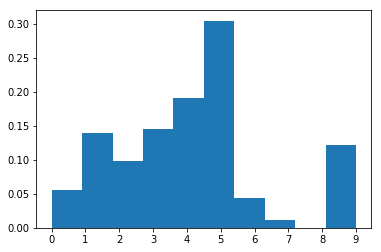

In [10]:
plt.hist(ran, normed=True)
plt.xticks(np.arange(0, 10, 1))
plt.show()

In [11]:
%%timeit
#уппорядоченный массив



def swap(a,i,j):
    t = a[i]
    a[i] = a[j]
    a[j] = t

c = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for i in range(10):
    for j in range(10):
        if a[i] > a[j]:
            swap(a,i,j)
            swap(c,i,j)




b = [0]

for i in range(10):
      b.append(a[i] + b[i])



ran = [random.uniform(0, 2.009) for i in range(1000)]

for i in range(len(ran)):
    for j in range(10):
        if(ran[i] >= b[j] and ran[i] <=b[j+1]):
            ran[i] = c[j]
            break
            
            


833 µs ± 6.92 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


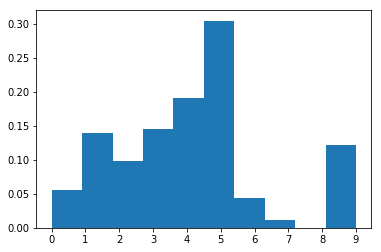

In [12]:
plt.hist(ran, normed=True)
plt.xticks(np.arange(0, 10, 1))
plt.show()

Стало быстрее на  12.5%

# Задача 2. 

В следующем предложении заключается идея метода inverse transform:

Если ξ имеет равномерное распределение в [0,1], тогда F−1(ξ) распределена по закону F. (Для каких F это верно?)

Смоделируйте выборку размера 1000 из распределения  Exp(λ) . Постройте выборочную гистограмму и точный график плотности распределения.

In [325]:
import math
ran = [random.uniform(0, 1) for i in range(1000)]
lambd = 1


for i in range(1000):
    ran[i] = math.log(1-ran[i])/(-1*lambd)
    

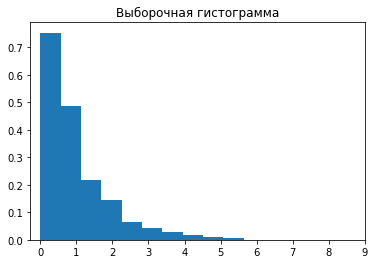

In [327]:
plt.hist(ran, normed=True)
plt.title('Выборочная гистограмма')
plt.xticks(np.arange(0, 10, 1))
plt.show()

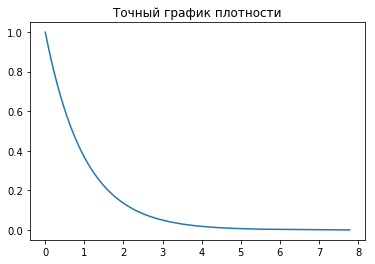

In [336]:
x = []
for i in range(1000):
    if(1-ran[i] > 0):
        m = math.log(1-ran[i])
        m = m/((-1)*lambd)
        x.append(m)

x.sort()

density = [lambd*math.exp(-lambd*i) for i in x]

plt.plot(x, density)
plt.title('Точный график плотности')
plt.show()


# Задача 3

Обоснуйте, что метод accept-reject действительно производит выборку из нужного распределения. Смоделируйте 1000 точек из усеченного распределения Коши, приведенного ниже, используя генератор равномерного распределения. Нарисуйте график полученной выборочной гистограммы и сравните его с графиком точной функции плотности.

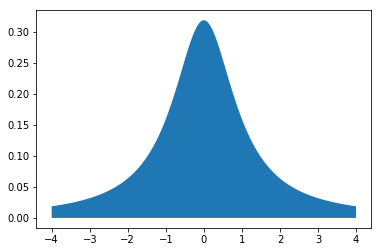

In [12]:
from scipy import stats
import numpy as np


dist = stats.cauchy()
x = np.linspace(-4, 4, 1000)


plt.fill_between(x, 0, dist.pdf(x)) #needs to be normalized!\
#print(dist.pdf(x))
#plt.show()

In [20]:
dots=np.zeros(1000)

for i in range(1000):
    flag = 0
    while flag  == 0:
        a = np.random.uniform(low=0,high=1)
        if a < dist.pdf(x[i]):
            dots[i] = a
            flag = 1
            break
            
#print(dots)

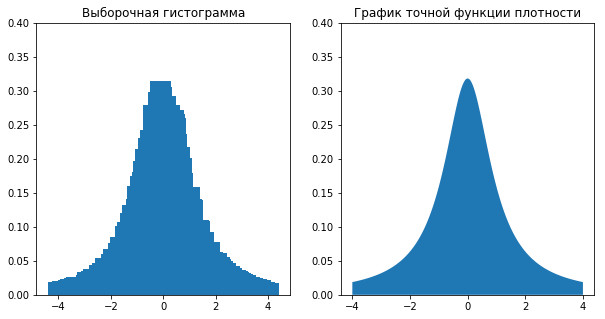

In [53]:
fig = plt.figure(figsize=(10,5))
ax_1 = fig.add_subplot(1, 2, 1)
ax_1.set_ylim([0, 0.4])
ax_1.set_title('Выборочная гистограмма')
ax_1 = plt.bar(x,dots)

ax_2 = fig.add_subplot(1, 2, 2)
ax_2.set_ylim([0, 0.4])
ax_2.set_title('График точной функции плотности')
xx = np.linspace(-4, 4, 1000)
ax_2 = plt.fill_between(xx, 0, dist.pdf(xx))


plt.show()

# Задача  4

Coordinate transformation method
Метод аccept-reject в ряде случаев может оказываться неэффективным и требовать слишком много пробных точек. Альтернатива - попробовать найти преобразование координат, которое переводит простую область (из которой легко сэмплить, например, едининчный квадрат) в требуемую, но при этом сохраняет соотношение площадей.

import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

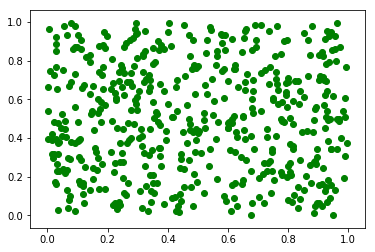

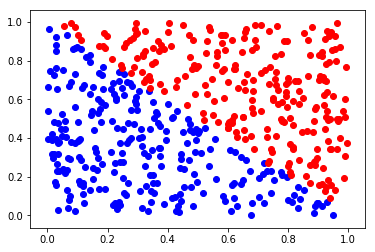

In [187]:
x = np.random.uniform(low=0, high=1,size=(500))
y = np.random.uniform(low=0, high=1,size=(500))

N1x = x[x+y<=1]
N1y = y[x+y<=1]

N2x = x[x+y>1]
N2y = y[x+y>1]

plt.scatter(x, y, color = 'green')
plt.show()

plt.scatter(N1x, N1y, color = 'blue')
plt.scatter(N2x, N2y, color = 'red')

Хотим перевести верхние точки в нижний угол.

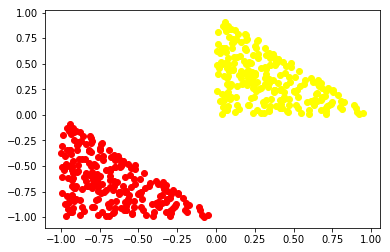

In [188]:
Tr = np.zeros((2,2))
Tr[0,0] = math.cos(math.pi)
#Tr[0,0] = math.cos(math.pi)
Tr[0,1] = (-1)*math.sin(math.pi)
Tr[1,0] = math.sin(math.pi)
Tr[1,1] = math.cos(math.pi)

N2 = np.array([N2x, N2y])

N2 = Tr.dot(N2)
plt.scatter(N2[0], N2[1], color = 'red')
N2 = N2+1
plt.scatter(N2[0], N2[1], color = 'yellow')

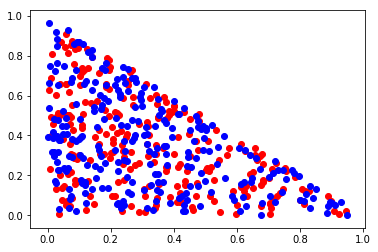

In [189]:
plt.scatter(N2[0], N2[1], color = 'red')
plt.scatter(N1x, N1y, color = 'blue')

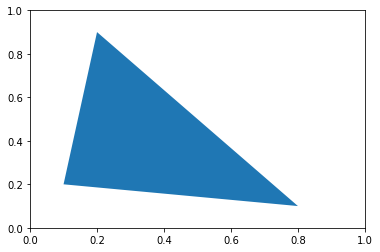

In [190]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

Осталось перевести верхний треугольник в нижний
также заметим, что верхний треугольник является прямоугольным

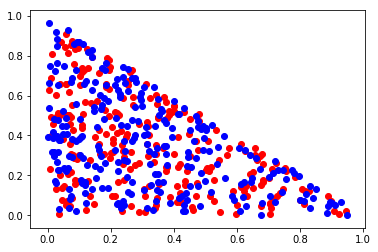

In [191]:
plt.scatter(N2[0], N2[1], color = 'red')
plt.scatter(N1x, N1y, color = 'blue')

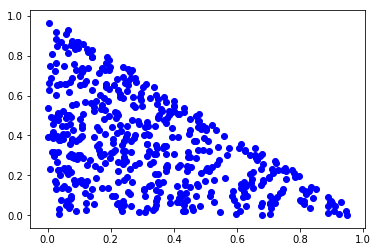

In [192]:
Nx = np.hstack((N1x, N2[0]))
Ny = np.hstack((N1y, N2[1]))
plt.scatter(Nx, Ny, color = 'blue')

Сделаем поворот

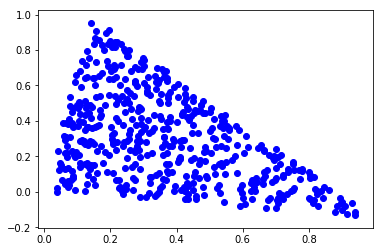

In [193]:
Tr = np.zeros((2,2))

Tr[0,0] = 7/math.sqrt(50)
Tr[0,1] = 1/math.sqrt(50)
Tr[1,0] = -1/math.sqrt(50)
Tr[1,1] = 7/math.sqrt(50)

N = np.array([Nx, Ny])
N = Tr.dot(N)

plt.scatter(N[0], N[1], color = 'blue')

In [194]:
N[0] = 0.1*math.sqrt(50)*N[0]
N[1] = 0.1*math.sqrt(50)*N[1]

In [195]:
N[0] = N[0] + 0.1
N[1] = N[1] + 0.2

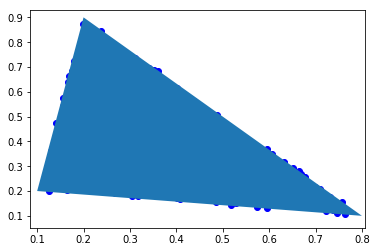

In [196]:
import matplotlib
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

plt.scatter(N[0], N[1], color = 'blue')
polygon = Polygon(0.1 * np.array([[1, 2], [2, 9], [8, 1]]), True)
plt.gca().add_collection(PatchCollection([polygon]))
plt.show()

# Задача 5

Задача
Смоделировать выборку из 500 точек внутри данного круга без использования метода отбора.

from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

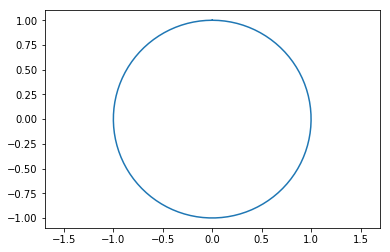

In [197]:
from matplotlib.patches import Circle
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t))
plt.axis('equal')
plt.show()

https://qarchive.ru/41617_sozdai_te_sluchai_nuju_tochku_vnutri_kruga__ravnomerno_#19823271

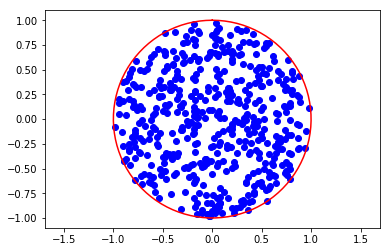

In [208]:
r = np.random.uniform(low=0, high=1,size=(500))
theta = np.random.uniform(low=0, high=1,size=(500))


r = np.sqrt(r)
theta = theta * 2 * math.pi

x = r*np.cos(theta)
y = r*np.sin(theta)

plt.scatter(x, y, color = 'blue')
t = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.sin(t), np.cos(t), color = 'red')
plt.axis('equal')
plt.show()

# Задача 6

Задача
Напишите функцию, которая моделирует случайное симметричное блуждание на двумерной решетке длины n c началом и концом в точке (0, 0). Приведите графики выборочных траекторий для n=100.

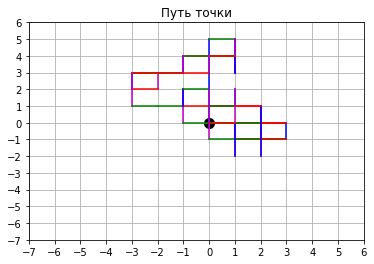

In [329]:
n = 100
N = np.array([0, 1])
W = np.array([-1, 0])
E = np.array([1, 0])
S = np.array([0, -1])

pos=np.array([0,0])

steps = np.zeros(n)
#print(steps)


def reverse(direct, steps):
    if(direct ==  1):
        a=4
    if(direct ==  2):
        a=3
    if(direct ==  3):
        a=2
    if(direct ==  4):
        a=1
    
    k = np.where(steps == 0)
    k = np.array(k[0])
    #print(k)
    if(k.size != 0):
        pos = int(random.uniform(1, k.size))-1
        steps[k[pos]] = a
        #print(k, k.size,'pos = ', pos)
        
    

for i in range(int(n)):
    if(steps[i] != 0):
        continue
  
    direct = int(random.uniform(1, 5)) 
    steps[i]=direct
    reverse(direct, steps)
    
for i in range(steps.size):
    if(steps[i] ==  1):
        #print(direct)
        plt.plot(np.array([pos[0], (pos+N)[0]]),np.array([pos[1], (pos+N)[1]]), color = 'blue')
        pos=(pos+N)
        
    if(steps[i] ==  2):
        #print(direct)
        plt.plot(np.array([pos[0], (pos+W)[0]]),np.array([pos[1], (pos+W)[1]]), color = 'red')
        pos=pos+W
        
    if(steps[i] ==  3):
        #print(direct)
        plt.plot(np.array([pos[0], (pos+E)[0]]),np.array([pos[1], (pos+E)[1]]), color = 'green')
        pos=pos+E
        
    if(steps[i] ==  4):
        #print(direct)
        plt.plot(np.array([pos[0], (pos+S)[0]]),np.array([pos[1], (pos+S)[1]]), color = 'm')
        pos=pos+S
        

plt.scatter(0, 0, color='black', s=100)
plt.xticks(np.arange(-7, 7, 1))
plt.yticks(np.arange(-7, 7, 1))
plt.title('Путь точки')
plt.grid()
plt.show()
    

# Задача 7

Задача
Докажите, что приведенный ниже алгоритм (Box-Muller algorithm) формирует выборку из независимых N(0,1) случаных величин. Модифицируйте метод, чтобы исключить вызовы тригонометрических функций np.sin и np.cos. С помощью модивицированного метода смоделируйте выборку объема 1000 из двумерного гауссовского распределения со средним (3, 6) и ковариационной матрицей ((2, 1), (1, 4)). Постройте 2D гистограмму полученного распределения.

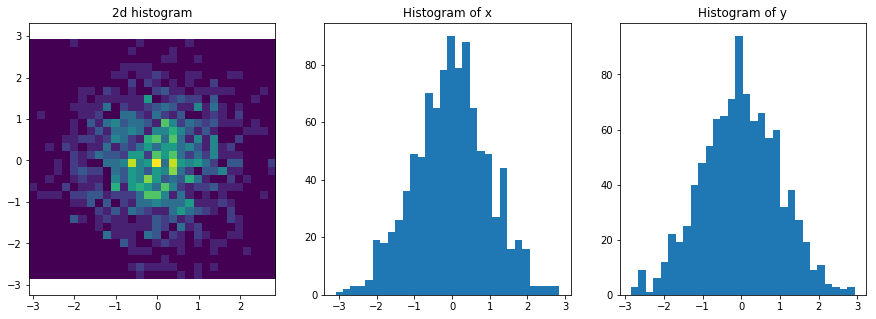

In [307]:
n = 1000
u1, u2 = np.random.rand(2, n)
r = np.sqrt(-2 * np.log(u1))
theta = 2 * np.pi * u2
x = r * np.cos(theta)
y = r * np.sin(theta)
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(x, y, bins=30)
ax[0].axis('equal')
ax[1].hist(x, bins=30)
ax[2].hist(y, bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

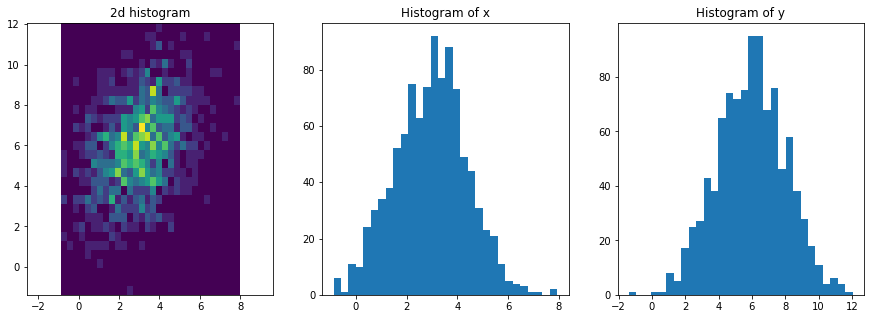

In [65]:
n = 1000
x = []
y = []
while len(x)<1000:
    d1,d2 = np.random.uniform(low=-1, high=1,size=(2,))
    s = d1**2+d2**2
    if s<=1 and s>0:
        x.append(d1)
        y.append(d2)
x = np.array(x)
y = np.array(y)
s = x**2+y**2
r = np.sqrt(np.log(s)*(-2) /s)
z_0 = x*r
z_1 = y*r
Z = np.array([z_0,z_1])

#сгенерировали из N(0,1), теперь приведем к нужному нам  виду

b = np.array([3,6]).reshape((2,1))
B = np.array([[1,1],[1/2-1/2*np.sqrt(7),1/2+1/2*np.sqrt(7)]])

Z = B.dot(Z)+b

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].hist2d(Z[0], Z[1], bins=30)
ax[0].axis('equal')
ax[1].hist(Z[0], bins=30)
ax[2].hist(Z[1], bins=30)
ax[0].set_title("2d histogram")
ax[1].set_title("Histogram of x")
ax[2].set_title("Histogram of y")
plt.show()

# Задача  8

Реализовать метод генерации случайного разбиения n-элементного множества на подмножества. С его помощью оценить ожидаемое число подмножеств в случайном разбиении множества из 100 элементов.

Подсказка 1: Ширяев, Вероятность, т1, задача 2 к параграфу 1.

Подсказка 2: http://djalil.chafai.net/blog/2012/05/03/generating-uniform-random-partitions/

28.6425


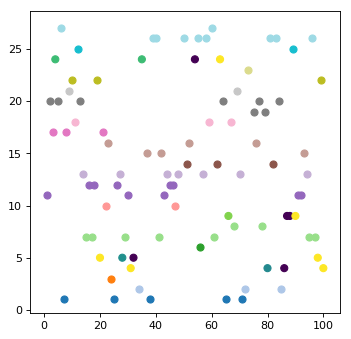

In [12]:
import random

def split(n):
    num =list(np.arange(1,n+1))
    
    Bn = 0
    for i in range(100):
        Bn += i**n/math.factorial(i)
    Bn /=math.e
    
    pr = [int(i)**int(n)/(math.factorial(i)*math.e*Bn) for i in num]
    K = random.choices(num, weights =  pr)#Выбрали число подмножеств
    
    C = np.random.randint(low = 1,high = K[0]+1,size= n )
    
    return C,int(K[0])



a,K = split(100)
num = np.arange(1,100+1)


categories = list(np.arange(1,K+1))
colors = [plt.cm.tab10(i/float(len(categories)+5)) for i in range(len(categories))]
plt.figure(figsize=(5, 5), dpi= 80, facecolor='w', edgecolor='k')

for i in range(K):
    plt.scatter(num[a == i],a[a == i],s=40,c=plt.cm.tab20(i/float(K-1)))
    
#оценим число множеств


number_of_attempts = 10000
summ = 0
for i in range(number_of_attempts):
    a,_ = split_generation(100)
    summ +=len(np.unique(a))
summ /=number_of_attempts
print(summ)


Получили 28,6425 множеств